In [57]:
# read it in to inspect it
# with open('input.txt', 'r', encoding='utf-8') as f:
#     text = f.read()

In [58]:
print("length of dataset in characters: ", len(text))

length of dataset in characters:  1115394


In [59]:
# let's look at the first 1000 characters
print(text[:100])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You


In [31]:
# analyze tokenize by word
import re

words = re.split(r'([,.]|\s)', text)
words = list(set(words))
vocab_size = len(words)
print(words[:10])

print(vocab_size)


['', "'once'", 'bodies--', 'eat!', 'heart:', 'gazes', 'softer', 'leave?', "Margaret's", "confusion's"]
19998


In [30]:
#analyze tokenzie by titoken
import importlib
import tiktoken

print("tiktoken version:", importlib.metadata.version("tiktoken"))

tokenizer = tiktoken.get_encoding("gpt2")
token_ids = tokenizer.encode(text)

vocab_size = len(set(token_ids))
print(vocab_size)


# enc = tiktoken.get_encoding("cl100k_base")
# assert enc.decode(enc.encode("hello world")) == "hello world"

# # To get the tokeniser corresponding to a specific model in the OpenAI API:
# enc = tiktoken.encoding_for_model("gpt-4")

tiktoken version: 0.5.2
11706


In [24]:

print(tokenizer.decode(token_ids[:100]))
print("---------")
sub_words = []
for i in range(100):
    sub_words.append(tokenizer.decode(token_ids[i:i+1]))

print(" ".join(sub_words))

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we
---------
First  Citizen : 
 Before  we  proceed  any  further ,  hear  me  speak . 
 
 All : 
 Spe ak ,  speak . 
 
 First  Citizen : 
 You  are  all  resolved  rather  to  die  than  to  fam ish ? 
 
 All : 
 Res olved .  resolved . 
 
 First  Citizen : 
 First ,  you  know  C ai us  Mar cius  is  chief  enemy  to  the  people . 
 
 All : 
 We  know 't ,  we  know 't . 
 
 First  Citizen : 
 Let  us  kill  him ,  and  we


In [32]:
# check some short subwords
uniqe_tokens = list(set(token_ids))
sub_words = []
for i in range(len(uniqe_tokens)):
    sub_words.append(tokenizer.decode(uniqe_tokens[i:i+1]))
sub_words.sort(key=lambda w:len(w))

print(sub_words[:200])


['!', '$', "'", ',', '-', '.', '3', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '\n', ' ', ' t', ' a', 'he', 'in', 're', 'on', 'er', ' s', 'at', ' w', ' o', 'en', ' c', 'it', 'is', 'an', 'or', 'es', ' b', 'ed', ' f', ' p', 'ou', 'al', 'ar', ' m', ' d', ' h', 'ic', 'as', 'le', 'om', 'll', ' n', ' l', 'st', 've', ' e', 'ro', 'ly', ' g', ' T', 'ct', 'id', 'ot', ' I', 'ut', 'et', ' A', 'im', 'am', 'ow', 'ay', 'ad', 'se', ' C', 'ac', ' y', 'ur', 'ld', ' M', "'s", 'ir', 'ce', 'il', ' B', 'ol', ' P', 'ch', ' D', 'if', 'ag', 'ke', ' H', 'em', ' W', ' R', ' r', 'od', ' F', 'ul', 'ri', 'pp', 'us', 'um', 'ab', ' N', 'th', ' G', 'un', 'op', ' L', ' v', 'ew', 'el', 'os', ' E', 'qu', 'nt', 'ra', 'pe', '--', ' O', ' J', 'iv', 'pt', 'ak', 'ud', 'ge', "'t", ' U', ' j', ' k', 'ok', 'ff'

In [71]:
# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)


 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
65


In [60]:
# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

print(encode("hii there"))
print(decode(encode("hii there")))

[46, 47, 47, 1, 58, 46, 43, 56, 43]
hii there


In [61]:
# let's now encode the entire text dataset and store it into a torch.Tensor
import torch # we use PyTorch: https://pytorch.org
data = torch.tensor(encode(text), dtype=torch.long)
print(data.shape, data.dtype)
print(data[:100]) # the 1000 characters we looked at earier will to the GPT look like this

torch.Size([1115394]) torch.int64
tensor([18, 47, 56, 57, 58,  1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 14, 43, 44,
        53, 56, 43,  1, 61, 43,  1, 54, 56, 53, 41, 43, 43, 42,  1, 39, 52, 63,
         1, 44, 59, 56, 58, 46, 43, 56,  6,  1, 46, 43, 39, 56,  1, 51, 43,  1,
        57, 54, 43, 39, 49,  8,  0,  0, 13, 50, 50, 10,  0, 31, 54, 43, 39, 49,
         6,  1, 57, 54, 43, 39, 49,  8,  0,  0, 18, 47, 56, 57, 58,  1, 15, 47,
        58, 47, 64, 43, 52, 10,  0, 37, 53, 59])


In [62]:
# Let's now split up the data into train and validation sets
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

In [63]:
block_size = 8
train_data[:block_size+1]

tensor([18, 47, 56, 57, 58,  1, 15, 47, 58])

In [64]:
x = train_data[:block_size]
y = train_data[1:block_size+1]
for t in range(block_size):
    context = x[:t+1]
    target = y[t]
    print(f"when input is {context} the target: {target}")

when input is tensor([18]) the target: 47
when input is tensor([18, 47]) the target: 56
when input is tensor([18, 47, 56]) the target: 57
when input is tensor([18, 47, 56, 57]) the target: 58
when input is tensor([18, 47, 56, 57, 58]) the target: 1
when input is tensor([18, 47, 56, 57, 58,  1]) the target: 15
when input is tensor([18, 47, 56, 57, 58,  1, 15]) the target: 47
when input is tensor([18, 47, 56, 57, 58,  1, 15, 47]) the target: 58


In [65]:
# ix = torch.randint(10, (4,))
# x = torch.stack([data[i:i+block_size] for i in ix])
# y = torch.stack([data[i+1:i+block_size+1] for i in ix])
# print(ix)

# print(x)
# print(y)



In [72]:
vocab_size

65

In [73]:
torch.manual_seed(1337)
batch_size = 4 # how many independent sequences will we process in parallel?
block_size = 8 # what is the maximum context length for predictions?

def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    return x, y

xb, yb = get_batch('train')
print('inputs:')
print(xb.shape)
print(xb)
print('targets:')
print(yb.shape)
print(yb)

print('----')

for b in range(batch_size): # batch dimension
    for t in range(block_size): # time dimension
        context = xb[b, :t+1]
        target = yb[b,t]
        print(f"when input is {context.tolist()} the target: {target}")

inputs:
torch.Size([4, 8])
tensor([[24, 43, 58,  5, 57,  1, 46, 43],
        [44, 53, 56,  1, 58, 46, 39, 58],
        [52, 58,  1, 58, 46, 39, 58,  1],
        [25, 17, 27, 10,  0, 21,  1, 54]])
targets:
torch.Size([4, 8])
tensor([[43, 58,  5, 57,  1, 46, 43, 39],
        [53, 56,  1, 58, 46, 39, 58,  1],
        [58,  1, 58, 46, 39, 58,  1, 46],
        [17, 27, 10,  0, 21,  1, 54, 39]])
----
when input is [24] the target: 43
when input is [24, 43] the target: 58
when input is [24, 43, 58] the target: 5
when input is [24, 43, 58, 5] the target: 57
when input is [24, 43, 58, 5, 57] the target: 1
when input is [24, 43, 58, 5, 57, 1] the target: 46
when input is [24, 43, 58, 5, 57, 1, 46] the target: 43
when input is [24, 43, 58, 5, 57, 1, 46, 43] the target: 39
when input is [44] the target: 53
when input is [44, 53] the target: 56
when input is [44, 53, 56] the target: 1
when input is [44, 53, 56, 1] the target: 58
when input is [44, 53, 56, 1, 58] the target: 46
when input is [44, 53

In [74]:
print(xb) # our input to the transformer

tensor([[24, 43, 58,  5, 57,  1, 46, 43],
        [44, 53, 56,  1, 58, 46, 39, 58],
        [52, 58,  1, 58, 46, 39, 58,  1],
        [25, 17, 27, 10,  0, 21,  1, 54]])


In [75]:
import torch
import torch.nn as nn
from torch.nn import functional as F
torch.manual_seed(1337)

class BigramLanguageModel(nn.Module):

    def __init__(self, vocab_size):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)

    def forward(self, idx, targets=None):

        # idx and targets are both (B,T) tensor of integers
        logits = self.token_embedding_table(idx) # (B,T,C)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # get the predictions
            logits, loss = self(idx)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

m = BigramLanguageModel(vocab_size)
logits, loss = m(xb, yb)
print(logits.shape)
print(loss)

print(decode(m.generate(idx = torch.zeros((1, 1), dtype=torch.long), max_new_tokens=100)[0].tolist()))


torch.Size([32, 65])
tensor(4.8786, grad_fn=<NllLossBackward0>)

Sr?qP-QWktXoL&jLDJgOLVz'RIoDqHdhsV&vLLxatjscMpwLERSPyao.qfzs$Ys$zF-w,;eEkzxjgCKFChs!iWW.ObzDnxA Ms$3


In [77]:
# create a PyTorch optimizer
optimizer = torch.optim.AdamW(m.parameters(), lr=1e-3)

In [78]:
batch_size = 32
for steps in range(100): # increase number of steps for good results...

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = m(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

print(loss.item())


4.587916374206543


In [79]:
print(decode(m.generate(idx = torch.zeros((1, 1), dtype=torch.long), max_new_tokens=500)[0].tolist()))


xiKi-RJ:CgqVuUa!U?qMH.uk!sCuMXvv!CJFfx;LgRyJknOEti.?I&-gPlLyulId?XlaInQ'q,lT$
3Q&sGlvHQ?mqSq-eON
x?SP fUAfCAuCX:bOlgiRQWN:Mphaw
tRLKuYXEaAXxrcq-gCUzeh3w!AcyaylgYWjmJM?Uzw:inaY,:C&OECW:vmGGJAn3onAuMgia!ms$Vb q-gCOcPcUhOnxJGUGSPJWT:.?ujmJFoiNL&A'DxY,prZ?qdT;hoo'dHooXXlxf'WkHK&u3Q?rqUi.kz;?Yx?C&u3Qbfzxlyh'Vl:zyxjKXgC?
lv'QKFiBeviNxO'm!Upm$srm&TqViqiBD3HBP!juEOpmZJyF$Fwfy!PlvWPFC
&WDdP!Ko,px
x
tREOE;AJ.BeXkylOVD3KHp$e?nD,.SFbWWI'ubcL!q-tU;aXmJ&uGXHxJXI&Z!gHRpajj;l.
pTErIBjx;JKIgoCnLGXrJSP!AU-AcbczR?


In [ ]:
## multinomial/temperature sampling

In [2]:


import numpy as np
import matplotlib.pyplot as plt

def visualize_multinomial_distribution(probabilities, num_samples, categories):
    # Sample from the multinomial distribution
    samples = np.random.multinomial(num_samples, probabilities)

    print(f'Sampling {num_samples} times, returns {len(samples)} unique samples, frequency of each samples is:{samples}' )
    

    # Plot the probabilities
    plt.bar(categories, samples / num_samples, align='center', alpha=0.7)
    plt.title('Multinomial Distribution Visualization')
    plt.xlabel('Categories')
    plt.ylabel('Probabilities')
    # Set x-axis ticks to show only integers (category numbers)
    plt.xticks(categories)
    plt.show()


def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))  # Subtracting max for numerical stability
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)



logits=[-1.   1.5  2.   2.7] probabilities=[0.0135657  0.16526404 0.27247433 0.54869593]
Sampling 1000 times, returns 4 unique samples, frequency of each samples is:[ 12 146 310 532]


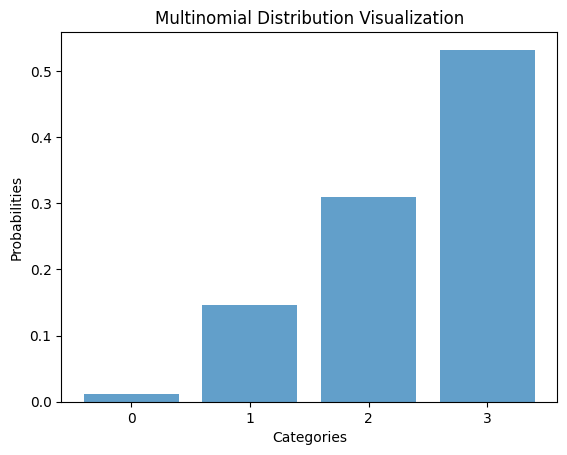

In [3]:
# Example probabilities and categories
temperature = 1
logits = np.array([-1.0, 1.5, 2, 2.7])
logits = logits/temperature  # adjust by temperature

num_samples = 1000
categories = np.arange(len(logits))

probabilities = softmax(logits)
print(f"logits={logits} probabilities={probabilities}")

# Visualize the multinomial distribution
visualize_multinomial_distribution(probabilities, num_samples, categories)


logits=[-2.5   3.75  5.    6.75] probabilities=[7.85445941e-05 4.06871070e-02 1.42011958e-01 8.17222391e-01]
Sampling 1000 times, returns 4 unique samples, frequency of each samples is:[  0  34 123 843]


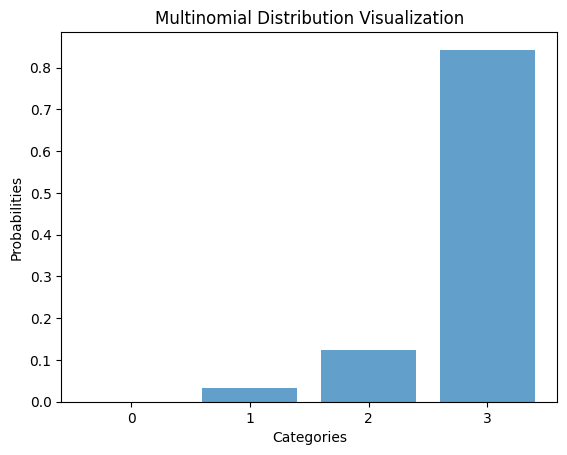

In [4]:
temperature = 0.4

logits = np.array([-1.0, 1.5, 2, 2.7])
logits = logits/temperature  # adjust by temperature

probabilities = softmax(logits)
print(f"logits={logits} probabilities={probabilities}")

# Visualize the multinomial distribution
visualize_multinomial_distribution(probabilities, num_samples, categories)



## top-p sampling (neucleus)

In [101]:
 
def visualize_nucleus_sampling(probabilities, nucleus_prob, num_samples, categories):
    # Sort the probabilities and categories in descending order
    sorted_indices = np.argsort(probabilities)[::-1]
    sorted_probabilities = probabilities[sorted_indices]
    sorted_categories = categories[sorted_indices]
    
    # Calculate cumulative probabilities
    cumulative_probabilities = np.cumsum(sorted_probabilities)

    # Find the nucleus indices
    nucleus_indices = np.where(cumulative_probabilities <= nucleus_prob)[0]
    selected_categories = sorted_indices[:nucleus_indices[-1] + 1]
    selected_probabilities = sorted_probabilities[:nucleus_indices[-1] + 1]

    # reverse to ascending order
    selected_categories = selected_categories[::-1]
    selected_probabilities = selected_probabilities[::-1]
    
    samples = np.random.multinomial(num_samples, selected_probabilities)

    print(f"sorted_probabilities={sorted_probabilities}")
    print(f"cumulative_probabilities={cumulative_probabilities}")
    print(f"nucleus_indices={nucleus_indices}")
    print(f"selected_categories={selected_categories}")
    print(f"selected_probabilities={selected_probabilities}")
    print(f"samples count {samples}")
    
    # Plot the probabilities
    plt.bar(selected_categories, samples / num_samples, align='center', alpha=0.7)
    plt.title('Nucleus Sampling Visualization')
    plt.xlabel('Categories')
    plt.ylabel('Probabilities')

    # Highlight nucleus categories
    # Set x-axis ticks to show only integers (category numbers)
    plt.xticks(sorted_categories)

    plt.show()



sorted_probabilities=[0.45 0.25 0.2  0.1 ]
cumulative_probabilities=[0.45 0.7  0.9  1.  ]
nucleus_indices=[0 1 2 3]
selected_categories=[0 1 2 3]
selected_probabilities=[0.1  0.2  0.25 0.45]
samples count [113 198 235 454]


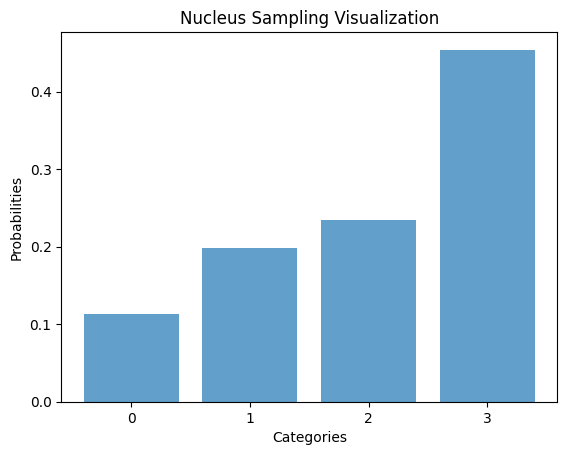

In [102]:

# Example probabilities and categories
probabilities = np.array([0.1, 0.2, 0.25, 0.45])
num_samples = 1000
categories = np.arange(len(probabilities))
top_p = 1.0  # Adjust the nucleus probability as needed

# Visualize nucleus sampling
visualize_nucleus_sampling(probabilities, top_p, num_samples, categories)

sorted_probabilities=[0.45 0.25 0.2  0.1 ]
cumulative_probabilities=[0.45 0.7  0.9  1.  ]
nucleus_indices=[0 1]
selected_categories=[2 3]
selected_probabilities=[0.25 0.45]
samples count [268 732]


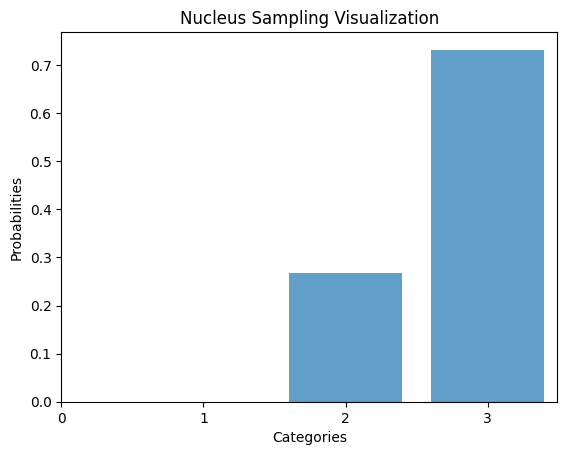

In [103]:
 top_p = 0.8  # Adjust the nucleus probability as needed

# Visualize nucleus sampling
visualize_nucleus_sampling(probabilities, top_p, num_samples, categories)

sorted_probabilities=[0.45 0.25 0.2  0.1 ]
cumulative_probabilities=[0.45 0.7  0.9  1.  ]
nucleus_indices=[0]
selected_categories=[3]
selected_probabilities=[0.45]
samples count [1000]


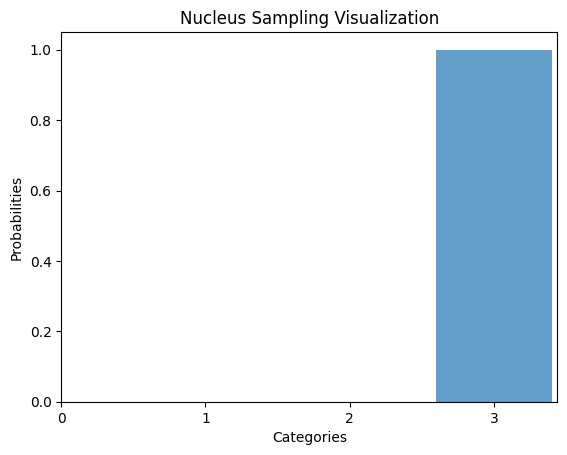

In [104]:
top_p = 0.5  # Adjust the nucleus probability as needed

# Visualize nucleus sampling
visualize_nucleus_sampling(probabilities, top_p, num_samples, categories)